In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("../data/train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df1=df[df['Sex']=='male']
df_male=df1[["Sex","Survived"]]
df_male

,Sex,Survived
0,male,0
4,male,0
5,male,0
6,male,0
7,male,0
...,...,...
883,male,0
884,male,0
886,male,0
889,male,1


In [5]:
df1=df[df['Sex']=='female']
df_female=df1[["Sex","Survived"]].sort_values(by="Survived")
df_female

,Sex,Survived
888,female,0
642,female,0
297,female,0
293,female,0
654,female,0
...,...,...
341,female,1
345,female,1
346,female,1
316,female,1


In [6]:
df_train=pd.read_csv("../data/train.csv")
df_test=pd.read_csv("../data/test.csv")
df_sur=pd.read_csv("../data/survival.csv")

In [7]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
print(len(df_train["Age"].unique()))
print((df_train["Age"].unique()))
print((df_train["Pclass"].unique()))
print((sorted(df_train["SibSp"].unique())))
print((sorted(df_train["Parch"].unique())))

89
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
[3 1 2]
[0, 1, 2, 3, 4, 5, 8]
[0, 1, 2, 3, 4, 5, 6]


In [10]:
print(df_train.shape)
print(df_test.shape)
print(df_sur.shape)

(891, 12)
(418, 11)
(418, 2)


# Correlations

In [11]:
print(df["Embarked"].unique())

['S' 'C' 'Q' nan]


          Survived    Pclass       Sex       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.543351 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000  0.131900 -0.369226  0.083081  0.018443 -0.549500
Sex      -0.543351  0.131900  1.000000  0.093254 -0.114631 -0.245489 -0.182333
Age      -0.077221 -0.369226  0.093254  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.114631 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.245489 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500 -0.182333  0.096067  0.159651  0.216225  1.000000


<Axes: >

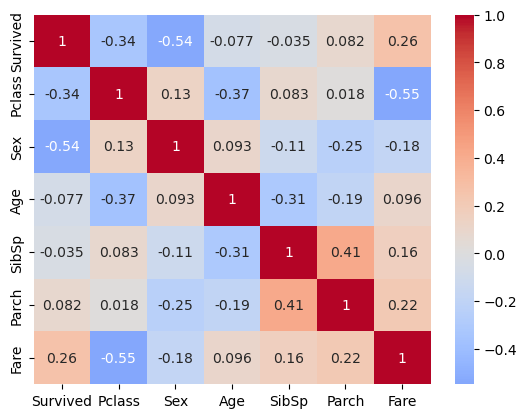

In [12]:
dfCor=df.drop(columns=["PassengerId","Name","Ticket","Cabin","Embarked"])
dfCor["Sex"]=dfCor["Sex"].map({"female":0, "male":1})
dfCor
correlation_matrix=dfCor.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Preparing data for plots

In [20]:
df=df.dropna(subset=["Age"])

def create_dict(col_name):
    data=dict()
    try:
        unique_values=sorted(df[col_name].unique())
    except Exception:
        unique_values=df[col_name].unique()
    for un in unique_values:
        data[str(un)]=[df[(df[col_name] == un) & (df['Survived'] == 0)].shape[0],df[(df[col_name] == un) & (df['Survived'] == 1)].shape[0]]
    return data

df_sex=pd.DataFrame(create_dict("Sex"))
df_embarked=pd.DataFrame(create_dict("Embarked"))
df_embarked=df_embarked.drop(columns="nan")
df_pclass=pd.DataFrame(create_dict("Pclass"))
df_sibsp=pd.DataFrame(create_dict("SibSp"))
df_parch=pd.DataFrame(create_dict("Parch"))
df_age=pd.DataFrame(create_dict("Age"))

df_sex.to_csv("../data/sex_plot.csv", index=False)
df_embarked.to_csv("../data/embarked_plot.csv", index=False)
df_pclass.to_csv("../data/pclass_plot.csv", index=False)
df_sibsp.to_csv("../data/sibsp_plot.csv", index=False)
df_parch.to_csv("../data/parch_plot.csv", index=False)
df_age.to_csv("../data/age_plot.csv", index=False)